<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_Text_Vectorization_and_Document_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Bag of Words (BoW) Matrix:
    animals  burned  but  carved  cold  dark  dies  eli  flame  glowed  ...  \
0        0       0    0       0     0     0     0    0      0       1  ...   
1        0       0    0       0     0     0     1    0      1       0  ...   
2        0       1    1       0     1     1     0    0      0       0  ...   
3        1       0    0       1     0     0     0    1      0       0  ...   

   silence  still  that  the  village  warm  was  winter  with  wooden  
0        0      0     0    1        0     1    0       0     1       0  
1        0      0     1    0        0     0    0       0     0       0  
2        0      1     0    2        0     0    1       1     0       0  
3        1      0     0    1        1     0    0       0     0       1  

[4 rows x 28 columns]

TF-IDF Matrix:
     animals    burned       but    carved      cold      dark      dies  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.

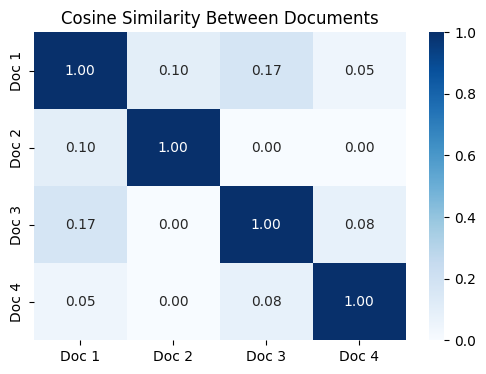

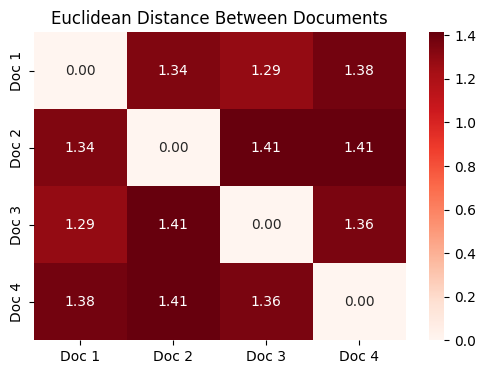

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Sample documents
docs = [
    "The lantern glowed with a warm light of hope.",
    "Hope is a flame that never dies.",
    "The cold winter night was dark, but the lantern still burned.",
    "In the village, Eli carved wooden animals in silence."
]

# 1. Bag of Words (BoW)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(docs)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
print("\nBag of Words (BoW) Matrix:\n", bow_df)

# 2. TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:\n", tfidf_df)

# 3. Cosine Similarity
cosine_sim_matrix = cosine_similarity(tfidf_matrix)
cosine_df = pd.DataFrame(cosine_sim_matrix, index=[f'Doc {i+1}' for i in range(len(docs))],
                         columns=[f'Doc {i+1}' for i in range(len(docs))])
print("\nCosine Similarity Matrix:\n", cosine_df)

# 4. Euclidean Distance
euclidean_dist_matrix = euclidean_distances(tfidf_matrix)
euclidean_df = pd.DataFrame(euclidean_dist_matrix, index=[f'Doc {i+1}' for i in range(len(docs))],
                            columns=[f'Doc {i+1}' for i in range(len(docs))])
print("\nEuclidean Distance Matrix:\n", euclidean_df)

# 5. Plot Cosine Similarity Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cosine_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Cosine Similarity Between Documents")
plt.show()

# 6. Plot Euclidean Distance Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(euclidean_df, annot=True, cmap="Reds", fmt=".2f")
plt.title("Euclidean Distance Between Documents")
plt.show()
